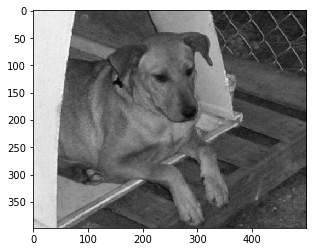

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\luisf\Documents\Machine Learning\PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break

In [3]:
print(img_array)

[[189 189 189 ...  29  29  31]
 [186 186 186 ...  36  35  36]
 [184 185 185 ...  35  33  33]
 ...
 [168 169 170 ...  71  72  72]
 [169 170 171 ...  68  67  67]
 [168 169 170 ...  64  63  62]]


In [4]:
print(img_array.shape)

(398, 500)


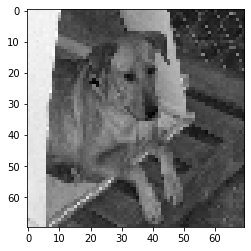

In [5]:
IMG_SIZE = 70

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:18<00:00, 682.45it/s]


24946


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
1
0
0
0
1
1


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[142]
   [147]
   [146]
   ...
   [108]
   [109]
   [111]]

  [[143]
   [148]
   [147]
   ...
   [111]
   [112]
   [112]]

  [[143]
   [149]
   [147]
   ...
   [109]
   [111]
   [112]]

  ...

  [[ 93]
   [ 96]
   [ 93]
   ...
   [121]
   [116]
   [111]]

  [[ 97]
   [102]
   [100]
   ...
   [110]
   [105]
   [105]]

  [[102]
   [105]
   [107]
   ...
   [113]
   [118]
   [110]]]]


In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "CatsDogs-cnn-64x2-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=20, validation_split=0.1, callbacks = [tensorboard])

Instructions for updating:
Colocations handled automatically by placer.
Train on 22451 samples, validate on 2495 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20


20448/22451 [==========================>...] - ETA: 33:16 - loss: 0.6911 - acc: 0.56 - ETA: 8:27 - loss: 0.6991 - acc: 0.5703 - ETA: 4:54 - loss: 0.6924 - acc: 0.571 - ETA: 3:28 - loss: 0.6937 - acc: 0.562 - ETA: 2:43 - loss: 0.6923 - acc: 0.555 - ETA: 2:14 - loss: 0.6924 - acc: 0.543 - ETA: 2:01 - loss: 0.6927 - acc: 0.538 - ETA: 1:45 - loss: 0.6926 - acc: 0.529 - ETA: 1:33 - loss: 0.6929 - acc: 0.520 - ETA: 1:23 - loss: 0.6925 - acc: 0.524 - ETA: 1:16 - loss: 0.6922 - acc: 0.528 - ETA: 1:10 - loss: 0.6920 - acc: 0.526 - ETA: 1:05 - loss: 0.6924 - acc: 0.520 - ETA: 1:00 - loss: 0.6924 - acc: 0.515 - ETA: 57s - loss: 0.6928 - acc: 0.516 - ETA: 53s - loss: 0.6927 - acc: 0.51 - ETA: 50s - loss: 0.6926 - acc: 0.51 - ETA: 48s - loss: 0.6924 - acc: 0.52 - ETA: 46s - loss: 0.6922 - acc: 0.52 - ETA: 44s - loss: 0.6921 - acc: 0.52 - ETA: 42s - loss: 0.6919 - acc: 0.52 - ETA: 40s - loss: 0.6913 - acc: 0.52 - ETA: 39s - loss: 0.6909 - acc: 0.52 - ETA: 37s - loss: 0.6910 - acc: 0.52 - ETA: 36s - 

22451/22451 [==============================] - ETA: 1s - loss: 0.6018 - acc: 0.663 - ETA: 1s - loss: 0.6018 - acc: 0.663 - ETA: 1s - loss: 0.6015 - acc: 0.663 - ETA: 1s - loss: 0.6013 - acc: 0.663 - ETA: 1s - loss: 0.6011 - acc: 0.663 - ETA: 1s - loss: 0.6006 - acc: 0.664 - ETA: 0s - loss: 0.6003 - acc: 0.665 - ETA: 0s - loss: 0.6001 - acc: 0.665 - ETA: 0s - loss: 0.5997 - acc: 0.665 - ETA: 0s - loss: 0.5992 - acc: 0.666 - ETA: 0s - loss: 0.5991 - acc: 0.666 - ETA: 0s - loss: 0.5987 - acc: 0.666 - ETA: 0s - loss: 0.5982 - acc: 0.666 - ETA: 0s - loss: 0.5982 - acc: 0.667 - ETA: 0s - loss: 0.5982 - acc: 0.667 - ETA: 0s - loss: 0.5982 - acc: 0.667 - ETA: 0s - loss: 0.5981 - acc: 0.667 - ETA: 0s - loss: 0.5976 - acc: 0.667 - ETA: 0s - loss: 0.5971 - acc: 0.668 - ETA: 0s - loss: 0.5968 - acc: 0.668 - 17s 744us/sample - loss: 0.5967 - acc: 0.6686 - val_loss: 0.5231 - val_acc: 0.7467
Epoch 2/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.4808 - acc: 0.75 - ETA: 13s - loss: 0.5243 - acc: 0.70 - ETA: 13s - loss: 0.5266 - acc: 0.74 - ETA: 12s - loss: 0.5261 - acc: 0.74 - ETA: 12s - loss: 0.5160 - acc: 0.74 - ETA: 12s - loss: 0.5159 - acc: 0.74 - ETA: 12s - loss: 0.5072 - acc: 0.75 - ETA: 12s - loss: 0.5163 - acc: 0.74 - ETA: 12s - loss: 0.5126 - acc: 0.74 - ETA: 12s - loss: 0.5187 - acc: 0.74 - ETA: 12s - loss: 0.5159 - acc: 0.74 - ETA: 12s - loss: 0.5188 - acc: 0.74 - ETA: 12s - loss: 0.5179 - acc: 0.74 - ETA: 12s - loss: 0.5213 - acc: 0.73 - ETA: 12s - loss: 0.5201 - acc: 0.73 - ETA: 12s - loss: 0.5145 - acc: 0.74 - ETA: 12s - loss: 0.5183 - acc: 0.74 - ETA: 12s - loss: 0.5120 - acc: 0.74 - ETA: 11s - loss: 0.5145 - acc: 0.74 - ETA: 11s - loss: 0.5156 - acc: 0.74 - ETA: 11s - loss: 0.5164 - acc: 0.74 - ETA: 11s - loss: 0.5152 - acc: 0.74 - ETA: 11s - loss: 0.5129 - acc: 0.74 - ETA: 11s - loss: 0.5125 - acc: 0.74 - ETA: 11s - loss: 0.5127 - acc: 0.74 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.4957 - acc: 0.761 - ETA: 0s - loss: 0.4959 - acc: 0.761 - ETA: 0s - loss: 0.4958 - acc: 0.761 - ETA: 0s - loss: 0.4950 - acc: 0.762 - ETA: 0s - loss: 0.4948 - acc: 0.762 - ETA: 0s - loss: 0.4949 - acc: 0.761 - ETA: 0s - loss: 0.4950 - acc: 0.762 - ETA: 0s - loss: 0.4948 - acc: 0.761 - ETA: 0s - loss: 0.4946 - acc: 0.762 - ETA: 0s - loss: 0.4945 - acc: 0.761 - ETA: 0s - loss: 0.4942 - acc: 0.762 - ETA: 0s - loss: 0.4941 - acc: 0.762 - ETA: 0s - loss: 0.4941 - acc: 0.762 - ETA: 0s - loss: 0.4943 - acc: 0.762 - ETA: 0s - loss: 0.4945 - acc: 0.761 - ETA: 0s - loss: 0.4945 - acc: 0.761 - ETA: 0s - loss: 0.4950 - acc: 0.761 - ETA: 0s - loss: 0.4949 - acc: 0.761 - ETA: 0s - loss: 0.4951 - acc: 0.761 - 14s 617us/sample - loss: 0.4952 - acc: 0.7614 - val_loss: 0.4782 - val_acc: 0.7756
Epoch 3/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.5062 - acc: 0.78 - ETA: 12s - loss: 0.5100 - acc: 0.76 - ETA: 13s - loss: 0.5099 - acc: 0.77 - ETA: 12s - loss: 0.4976 - acc: 0.77 - ETA: 12s - loss: 0.4969 - acc: 0.77 - ETA: 12s - loss: 0.4961 - acc: 0.76 - ETA: 12s - loss: 0.4821 - acc: 0.76 - ETA: 12s - loss: 0.4691 - acc: 0.77 - ETA: 12s - loss: 0.4674 - acc: 0.78 - ETA: 12s - loss: 0.4559 - acc: 0.79 - ETA: 12s - loss: 0.4648 - acc: 0.78 - ETA: 12s - loss: 0.4585 - acc: 0.78 - ETA: 12s - loss: 0.4585 - acc: 0.78 - ETA: 12s - loss: 0.4542 - acc: 0.78 - ETA: 12s - loss: 0.4529 - acc: 0.79 - ETA: 12s - loss: 0.4543 - acc: 0.79 - ETA: 12s - loss: 0.4579 - acc: 0.79 - ETA: 12s - loss: 0.4606 - acc: 0.78 - ETA: 12s - loss: 0.4597 - acc: 0.78 - ETA: 12s - loss: 0.4561 - acc: 0.78 - ETA: 12s - loss: 0.4586 - acc: 0.78 - ETA: 12s - loss: 0.4582 - acc: 0.78 - ETA: 12s - loss: 0.4579 - acc: 0.78 - ETA: 12s - loss: 0.4601 - acc: 0.78 - ETA: 12s - loss: 0.4604 - acc: 0.78 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.4535 - acc: 0.792 - ETA: 0s - loss: 0.4532 - acc: 0.792 - ETA: 0s - loss: 0.4533 - acc: 0.792 - ETA: 0s - loss: 0.4532 - acc: 0.792 - ETA: 0s - loss: 0.4531 - acc: 0.792 - ETA: 0s - loss: 0.4529 - acc: 0.792 - ETA: 0s - loss: 0.4526 - acc: 0.793 - ETA: 0s - loss: 0.4526 - acc: 0.793 - ETA: 0s - loss: 0.4524 - acc: 0.793 - ETA: 0s - loss: 0.4526 - acc: 0.792 - ETA: 0s - loss: 0.4527 - acc: 0.792 - ETA: 0s - loss: 0.4528 - acc: 0.792 - ETA: 0s - loss: 0.4523 - acc: 0.792 - ETA: 0s - loss: 0.4526 - acc: 0.792 - ETA: 0s - loss: 0.4528 - acc: 0.792 - ETA: 0s - loss: 0.4528 - acc: 0.792 - ETA: 0s - loss: 0.4522 - acc: 0.792 - ETA: 0s - loss: 0.4521 - acc: 0.792 - ETA: 0s - loss: 0.4518 - acc: 0.793 - 14s 616us/sample - loss: 0.4518 - acc: 0.7930 - val_loss: 0.4523 - val_acc: 0.7956
Epoch 4/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.4093 - acc: 0.81 - ETA: 13s - loss: 0.3689 - acc: 0.83 - ETA: 13s - loss: 0.3850 - acc: 0.81 - ETA: 12s - loss: 0.3901 - acc: 0.81 - ETA: 12s - loss: 0.4101 - acc: 0.80 - ETA: 12s - loss: 0.4090 - acc: 0.80 - ETA: 12s - loss: 0.3963 - acc: 0.81 - ETA: 12s - loss: 0.3965 - acc: 0.81 - ETA: 12s - loss: 0.3933 - acc: 0.81 - ETA: 12s - loss: 0.3954 - acc: 0.82 - ETA: 12s - loss: 0.3913 - acc: 0.82 - ETA: 12s - loss: 0.3926 - acc: 0.81 - ETA: 12s - loss: 0.3933 - acc: 0.81 - ETA: 12s - loss: 0.3901 - acc: 0.81 - ETA: 12s - loss: 0.3871 - acc: 0.81 - ETA: 12s - loss: 0.3932 - acc: 0.81 - ETA: 12s - loss: 0.4011 - acc: 0.80 - ETA: 12s - loss: 0.4019 - acc: 0.80 - ETA: 12s - loss: 0.4061 - acc: 0.80 - ETA: 12s - loss: 0.4049 - acc: 0.80 - ETA: 12s - loss: 0.4022 - acc: 0.80 - ETA: 11s - loss: 0.4025 - acc: 0.81 - ETA: 11s - loss: 0.4021 - acc: 0.81 - ETA: 11s - loss: 0.4044 - acc: 0.80 - ETA: 11s - loss: 0.4063 - acc: 0.80 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.4207 - acc: 0.808 - ETA: 0s - loss: 0.4206 - acc: 0.808 - ETA: 0s - loss: 0.4204 - acc: 0.808 - ETA: 0s - loss: 0.4209 - acc: 0.808 - ETA: 0s - loss: 0.4206 - acc: 0.808 - ETA: 0s - loss: 0.4210 - acc: 0.808 - ETA: 0s - loss: 0.4209 - acc: 0.808 - ETA: 0s - loss: 0.4206 - acc: 0.808 - ETA: 0s - loss: 0.4203 - acc: 0.808 - ETA: 0s - loss: 0.4201 - acc: 0.808 - ETA: 0s - loss: 0.4205 - acc: 0.808 - ETA: 0s - loss: 0.4203 - acc: 0.808 - ETA: 0s - loss: 0.4204 - acc: 0.808 - ETA: 0s - loss: 0.4202 - acc: 0.808 - ETA: 0s - loss: 0.4202 - acc: 0.808 - ETA: 0s - loss: 0.4204 - acc: 0.808 - ETA: 0s - loss: 0.4205 - acc: 0.808 - ETA: 0s - loss: 0.4208 - acc: 0.808 - ETA: 0s - loss: 0.4209 - acc: 0.808 - 14s 614us/sample - loss: 0.4206 - acc: 0.8083 - val_loss: 0.4523 - val_acc: 0.7936
Epoch 5/20


20576/22451 [==========================>...] - ETA: 14s - loss: 0.5072 - acc: 0.75 - ETA: 13s - loss: 0.4204 - acc: 0.80 - ETA: 13s - loss: 0.4437 - acc: 0.81 - ETA: 13s - loss: 0.4306 - acc: 0.80 - ETA: 12s - loss: 0.4198 - acc: 0.81 - ETA: 12s - loss: 0.4193 - acc: 0.80 - ETA: 12s - loss: 0.4197 - acc: 0.80 - ETA: 12s - loss: 0.4061 - acc: 0.81 - ETA: 12s - loss: 0.4195 - acc: 0.81 - ETA: 12s - loss: 0.4132 - acc: 0.81 - ETA: 12s - loss: 0.4167 - acc: 0.80 - ETA: 12s - loss: 0.4099 - acc: 0.81 - ETA: 12s - loss: 0.4142 - acc: 0.81 - ETA: 12s - loss: 0.4164 - acc: 0.80 - ETA: 12s - loss: 0.4100 - acc: 0.81 - ETA: 12s - loss: 0.4099 - acc: 0.81 - ETA: 12s - loss: 0.4076 - acc: 0.81 - ETA: 12s - loss: 0.4069 - acc: 0.81 - ETA: 12s - loss: 0.4057 - acc: 0.81 - ETA: 12s - loss: 0.4059 - acc: 0.81 - ETA: 12s - loss: 0.4045 - acc: 0.82 - ETA: 12s - loss: 0.3998 - acc: 0.82 - ETA: 12s - loss: 0.3993 - acc: 0.82 - ETA: 12s - loss: 0.3978 - acc: 0.82 - ETA: 12s - loss: 0.3985 - acc: 0.81 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.3968 - acc: 0.819 - ETA: 1s - loss: 0.3966 - acc: 0.819 - ETA: 0s - loss: 0.3964 - acc: 0.819 - ETA: 0s - loss: 0.3963 - acc: 0.820 - ETA: 0s - loss: 0.3958 - acc: 0.820 - ETA: 0s - loss: 0.3958 - acc: 0.820 - ETA: 0s - loss: 0.3953 - acc: 0.820 - ETA: 0s - loss: 0.3951 - acc: 0.820 - ETA: 0s - loss: 0.3948 - acc: 0.820 - ETA: 0s - loss: 0.3950 - acc: 0.820 - ETA: 0s - loss: 0.3953 - acc: 0.820 - ETA: 0s - loss: 0.3956 - acc: 0.820 - ETA: 0s - loss: 0.3956 - acc: 0.820 - ETA: 0s - loss: 0.3962 - acc: 0.820 - ETA: 0s - loss: 0.3960 - acc: 0.820 - ETA: 0s - loss: 0.3957 - acc: 0.820 - ETA: 0s - loss: 0.3963 - acc: 0.820 - ETA: 0s - loss: 0.3962 - acc: 0.820 - ETA: 0s - loss: 0.3959 - acc: 0.820 - 14s 625us/sample - loss: 0.3959 - acc: 0.8203 - val_loss: 0.4456 - val_acc: 0.7884
Epoch 6/20


20576/22451 [==========================>...] - ETA: 15s - loss: 0.3470 - acc: 0.81 - ETA: 13s - loss: 0.4233 - acc: 0.80 - ETA: 13s - loss: 0.3720 - acc: 0.84 - ETA: 13s - loss: 0.3737 - acc: 0.84 - ETA: 12s - loss: 0.3516 - acc: 0.85 - ETA: 12s - loss: 0.3478 - acc: 0.84 - ETA: 12s - loss: 0.3363 - acc: 0.85 - ETA: 12s - loss: 0.3400 - acc: 0.85 - ETA: 12s - loss: 0.3413 - acc: 0.85 - ETA: 12s - loss: 0.3426 - acc: 0.84 - ETA: 12s - loss: 0.3476 - acc: 0.84 - ETA: 12s - loss: 0.3525 - acc: 0.84 - ETA: 12s - loss: 0.3610 - acc: 0.83 - ETA: 12s - loss: 0.3619 - acc: 0.83 - ETA: 12s - loss: 0.3637 - acc: 0.83 - ETA: 12s - loss: 0.3726 - acc: 0.82 - ETA: 12s - loss: 0.3748 - acc: 0.82 - ETA: 12s - loss: 0.3766 - acc: 0.82 - ETA: 12s - loss: 0.3755 - acc: 0.82 - ETA: 12s - loss: 0.3728 - acc: 0.82 - ETA: 12s - loss: 0.3708 - acc: 0.83 - ETA: 12s - loss: 0.3710 - acc: 0.83 - ETA: 11s - loss: 0.3718 - acc: 0.83 - ETA: 11s - loss: 0.3721 - acc: 0.83 - ETA: 11s - loss: 0.3701 - acc: 0.83 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.3737 - acc: 0.835 - ETA: 1s - loss: 0.3735 - acc: 0.835 - ETA: 0s - loss: 0.3732 - acc: 0.835 - ETA: 0s - loss: 0.3735 - acc: 0.835 - ETA: 0s - loss: 0.3731 - acc: 0.835 - ETA: 0s - loss: 0.3733 - acc: 0.835 - ETA: 0s - loss: 0.3732 - acc: 0.835 - ETA: 0s - loss: 0.3730 - acc: 0.836 - ETA: 0s - loss: 0.3730 - acc: 0.836 - ETA: 0s - loss: 0.3730 - acc: 0.835 - ETA: 0s - loss: 0.3729 - acc: 0.836 - ETA: 0s - loss: 0.3728 - acc: 0.836 - ETA: 0s - loss: 0.3728 - acc: 0.836 - ETA: 0s - loss: 0.3730 - acc: 0.836 - ETA: 0s - loss: 0.3724 - acc: 0.836 - ETA: 0s - loss: 0.3722 - acc: 0.836 - ETA: 0s - loss: 0.3722 - acc: 0.836 - ETA: 0s - loss: 0.3719 - acc: 0.836 - ETA: 0s - loss: 0.3716 - acc: 0.836 - 14s 622us/sample - loss: 0.3718 - acc: 0.8365 - val_loss: 0.4353 - val_acc: 0.8144
Epoch 7/20


20576/22451 [==========================>...] - ETA: 14s - loss: 0.3992 - acc: 0.87 - ETA: 13s - loss: 0.3209 - acc: 0.89 - ETA: 13s - loss: 0.2967 - acc: 0.91 - ETA: 13s - loss: 0.3233 - acc: 0.87 - ETA: 13s - loss: 0.3380 - acc: 0.86 - ETA: 12s - loss: 0.3535 - acc: 0.85 - ETA: 12s - loss: 0.3444 - acc: 0.86 - ETA: 12s - loss: 0.3503 - acc: 0.85 - ETA: 12s - loss: 0.3530 - acc: 0.85 - ETA: 12s - loss: 0.3475 - acc: 0.85 - ETA: 12s - loss: 0.3381 - acc: 0.86 - ETA: 12s - loss: 0.3403 - acc: 0.86 - ETA: 12s - loss: 0.3370 - acc: 0.86 - ETA: 12s - loss: 0.3354 - acc: 0.86 - ETA: 12s - loss: 0.3328 - acc: 0.86 - ETA: 12s - loss: 0.3258 - acc: 0.87 - ETA: 12s - loss: 0.3267 - acc: 0.86 - ETA: 12s - loss: 0.3287 - acc: 0.86 - ETA: 12s - loss: 0.3356 - acc: 0.86 - ETA: 12s - loss: 0.3322 - acc: 0.86 - ETA: 12s - loss: 0.3283 - acc: 0.86 - ETA: 12s - loss: 0.3304 - acc: 0.86 - ETA: 12s - loss: 0.3324 - acc: 0.86 - ETA: 11s - loss: 0.3308 - acc: 0.86 - ETA: 11s - loss: 0.3330 - acc: 0.85 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.3511 - acc: 0.844 - ETA: 0s - loss: 0.3507 - acc: 0.844 - ETA: 0s - loss: 0.3505 - acc: 0.844 - ETA: 0s - loss: 0.3503 - acc: 0.845 - ETA: 0s - loss: 0.3505 - acc: 0.844 - ETA: 0s - loss: 0.3506 - acc: 0.845 - ETA: 0s - loss: 0.3507 - acc: 0.845 - ETA: 0s - loss: 0.3507 - acc: 0.845 - ETA: 0s - loss: 0.3511 - acc: 0.844 - ETA: 0s - loss: 0.3510 - acc: 0.844 - ETA: 0s - loss: 0.3508 - acc: 0.844 - ETA: 0s - loss: 0.3509 - acc: 0.844 - ETA: 0s - loss: 0.3509 - acc: 0.844 - ETA: 0s - loss: 0.3511 - acc: 0.844 - ETA: 0s - loss: 0.3509 - acc: 0.844 - ETA: 0s - loss: 0.3508 - acc: 0.844 - ETA: 0s - loss: 0.3508 - acc: 0.844 - ETA: 0s - loss: 0.3503 - acc: 0.845 - ETA: 0s - loss: 0.3503 - acc: 0.845 - 14s 613us/sample - loss: 0.3500 - acc: 0.8455 - val_loss: 0.4385 - val_acc: 0.8032
Epoch 8/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.3121 - acc: 0.84 - ETA: 13s - loss: 0.3118 - acc: 0.85 - ETA: 13s - loss: 0.3211 - acc: 0.85 - ETA: 12s - loss: 0.2890 - acc: 0.87 - ETA: 12s - loss: 0.3092 - acc: 0.86 - ETA: 12s - loss: 0.3051 - acc: 0.86 - ETA: 12s - loss: 0.3084 - acc: 0.86 - ETA: 12s - loss: 0.3062 - acc: 0.86 - ETA: 12s - loss: 0.3000 - acc: 0.87 - ETA: 12s - loss: 0.3001 - acc: 0.87 - ETA: 12s - loss: 0.3075 - acc: 0.87 - ETA: 12s - loss: 0.3106 - acc: 0.86 - ETA: 12s - loss: 0.3105 - acc: 0.87 - ETA: 12s - loss: 0.3102 - acc: 0.87 - ETA: 12s - loss: 0.3090 - acc: 0.87 - ETA: 12s - loss: 0.3072 - acc: 0.87 - ETA: 12s - loss: 0.3050 - acc: 0.87 - ETA: 12s - loss: 0.3072 - acc: 0.87 - ETA: 12s - loss: 0.3063 - acc: 0.87 - ETA: 12s - loss: 0.3057 - acc: 0.87 - ETA: 12s - loss: 0.3126 - acc: 0.87 - ETA: 12s - loss: 0.3147 - acc: 0.87 - ETA: 11s - loss: 0.3155 - acc: 0.87 - ETA: 11s - loss: 0.3150 - acc: 0.87 - ETA: 11s - loss: 0.3122 - acc: 0.87 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.3307 - acc: 0.855 - ETA: 1s - loss: 0.3301 - acc: 0.856 - ETA: 0s - loss: 0.3304 - acc: 0.855 - ETA: 0s - loss: 0.3304 - acc: 0.855 - ETA: 0s - loss: 0.3308 - acc: 0.855 - ETA: 0s - loss: 0.3306 - acc: 0.855 - ETA: 0s - loss: 0.3309 - acc: 0.855 - ETA: 0s - loss: 0.3309 - acc: 0.855 - ETA: 0s - loss: 0.3308 - acc: 0.855 - ETA: 0s - loss: 0.3307 - acc: 0.856 - ETA: 0s - loss: 0.3303 - acc: 0.856 - ETA: 0s - loss: 0.3306 - acc: 0.855 - ETA: 0s - loss: 0.3306 - acc: 0.855 - ETA: 0s - loss: 0.3304 - acc: 0.855 - ETA: 0s - loss: 0.3302 - acc: 0.855 - ETA: 0s - loss: 0.3301 - acc: 0.856 - ETA: 0s - loss: 0.3301 - acc: 0.855 - ETA: 0s - loss: 0.3301 - acc: 0.856 - ETA: 0s - loss: 0.3298 - acc: 0.856 - 14s 625us/sample - loss: 0.3295 - acc: 0.8563 - val_loss: 0.4409 - val_acc: 0.8132
Epoch 9/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.3251 - acc: 0.84 - ETA: 13s - loss: 0.2752 - acc: 0.87 - ETA: 13s - loss: 0.2778 - acc: 0.87 - ETA: 13s - loss: 0.2756 - acc: 0.87 - ETA: 13s - loss: 0.2813 - acc: 0.86 - ETA: 12s - loss: 0.2948 - acc: 0.86 - ETA: 12s - loss: 0.3126 - acc: 0.85 - ETA: 12s - loss: 0.3171 - acc: 0.85 - ETA: 12s - loss: 0.3158 - acc: 0.85 - ETA: 12s - loss: 0.3229 - acc: 0.84 - ETA: 12s - loss: 0.3326 - acc: 0.84 - ETA: 12s - loss: 0.3375 - acc: 0.84 - ETA: 12s - loss: 0.3414 - acc: 0.83 - ETA: 12s - loss: 0.3398 - acc: 0.83 - ETA: 12s - loss: 0.3307 - acc: 0.84 - ETA: 12s - loss: 0.3284 - acc: 0.84 - ETA: 12s - loss: 0.3333 - acc: 0.84 - ETA: 12s - loss: 0.3277 - acc: 0.84 - ETA: 12s - loss: 0.3288 - acc: 0.84 - ETA: 12s - loss: 0.3251 - acc: 0.84 - ETA: 12s - loss: 0.3214 - acc: 0.84 - ETA: 12s - loss: 0.3293 - acc: 0.84 - ETA: 12s - loss: 0.3278 - acc: 0.85 - ETA: 12s - loss: 0.3281 - acc: 0.84 - ETA: 12s - loss: 0.3292 - acc: 0.84 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.3093 - acc: 0.865 - ETA: 1s - loss: 0.3093 - acc: 0.865 - ETA: 0s - loss: 0.3092 - acc: 0.866 - ETA: 0s - loss: 0.3092 - acc: 0.865 - ETA: 0s - loss: 0.3090 - acc: 0.865 - ETA: 0s - loss: 0.3090 - acc: 0.865 - ETA: 0s - loss: 0.3088 - acc: 0.865 - ETA: 0s - loss: 0.3090 - acc: 0.865 - ETA: 0s - loss: 0.3087 - acc: 0.865 - ETA: 0s - loss: 0.3087 - acc: 0.865 - ETA: 0s - loss: 0.3083 - acc: 0.866 - ETA: 0s - loss: 0.3084 - acc: 0.866 - ETA: 0s - loss: 0.3087 - acc: 0.866 - ETA: 0s - loss: 0.3085 - acc: 0.866 - ETA: 0s - loss: 0.3086 - acc: 0.866 - ETA: 0s - loss: 0.3085 - acc: 0.866 - ETA: 0s - loss: 0.3084 - acc: 0.866 - ETA: 0s - loss: 0.3088 - acc: 0.866 - ETA: 0s - loss: 0.3085 - acc: 0.866 - 14s 628us/sample - loss: 0.3087 - acc: 0.8661 - val_loss: 0.4337 - val_acc: 0.8136
Epoch 10/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.3234 - acc: 0.87 - ETA: 13s - loss: 0.3154 - acc: 0.88 - ETA: 13s - loss: 0.2916 - acc: 0.89 - ETA: 13s - loss: 0.2740 - acc: 0.88 - ETA: 12s - loss: 0.2807 - acc: 0.87 - ETA: 12s - loss: 0.2696 - acc: 0.88 - ETA: 12s - loss: 0.2763 - acc: 0.87 - ETA: 12s - loss: 0.2708 - acc: 0.87 - ETA: 12s - loss: 0.2695 - acc: 0.87 - ETA: 12s - loss: 0.2688 - acc: 0.87 - ETA: 12s - loss: 0.2830 - acc: 0.87 - ETA: 12s - loss: 0.2894 - acc: 0.87 - ETA: 12s - loss: 0.2840 - acc: 0.87 - ETA: 12s - loss: 0.2811 - acc: 0.88 - ETA: 12s - loss: 0.2817 - acc: 0.88 - ETA: 12s - loss: 0.2793 - acc: 0.88 - ETA: 12s - loss: 0.2816 - acc: 0.88 - ETA: 12s - loss: 0.2789 - acc: 0.88 - ETA: 12s - loss: 0.2782 - acc: 0.88 - ETA: 12s - loss: 0.2761 - acc: 0.88 - ETA: 12s - loss: 0.2724 - acc: 0.88 - ETA: 12s - loss: 0.2674 - acc: 0.89 - ETA: 12s - loss: 0.2665 - acc: 0.89 - ETA: 12s - loss: 0.2643 - acc: 0.89 - ETA: 12s - loss: 0.2657 - acc: 0.89 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.2907 - acc: 0.877 - ETA: 0s - loss: 0.2909 - acc: 0.877 - ETA: 0s - loss: 0.2914 - acc: 0.876 - ETA: 0s - loss: 0.2915 - acc: 0.876 - ETA: 0s - loss: 0.2916 - acc: 0.876 - ETA: 0s - loss: 0.2922 - acc: 0.876 - ETA: 0s - loss: 0.2918 - acc: 0.876 - ETA: 0s - loss: 0.2917 - acc: 0.876 - ETA: 0s - loss: 0.2918 - acc: 0.876 - ETA: 0s - loss: 0.2921 - acc: 0.876 - ETA: 0s - loss: 0.2921 - acc: 0.876 - ETA: 0s - loss: 0.2924 - acc: 0.876 - ETA: 0s - loss: 0.2924 - acc: 0.876 - ETA: 0s - loss: 0.2923 - acc: 0.876 - ETA: 0s - loss: 0.2924 - acc: 0.876 - ETA: 0s - loss: 0.2922 - acc: 0.876 - ETA: 0s - loss: 0.2924 - acc: 0.875 - ETA: 0s - loss: 0.2923 - acc: 0.876 - ETA: 0s - loss: 0.2925 - acc: 0.876 - 14s 617us/sample - loss: 0.2926 - acc: 0.8760 - val_loss: 0.4343 - val_acc: 0.8120
Epoch 11/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.2915 - acc: 0.90 - ETA: 13s - loss: 0.3407 - acc: 0.84 - ETA: 12s - loss: 0.3128 - acc: 0.86 - ETA: 12s - loss: 0.2873 - acc: 0.87 - ETA: 12s - loss: 0.3042 - acc: 0.87 - ETA: 12s - loss: 0.3032 - acc: 0.87 - ETA: 12s - loss: 0.2889 - acc: 0.87 - ETA: 12s - loss: 0.2869 - acc: 0.87 - ETA: 12s - loss: 0.2811 - acc: 0.88 - ETA: 12s - loss: 0.2836 - acc: 0.88 - ETA: 12s - loss: 0.2768 - acc: 0.88 - ETA: 12s - loss: 0.2803 - acc: 0.88 - ETA: 12s - loss: 0.2781 - acc: 0.88 - ETA: 12s - loss: 0.2733 - acc: 0.88 - ETA: 12s - loss: 0.2735 - acc: 0.88 - ETA: 12s - loss: 0.2722 - acc: 0.88 - ETA: 12s - loss: 0.2729 - acc: 0.88 - ETA: 12s - loss: 0.2743 - acc: 0.88 - ETA: 12s - loss: 0.2764 - acc: 0.88 - ETA: 12s - loss: 0.2759 - acc: 0.88 - ETA: 12s - loss: 0.2765 - acc: 0.88 - ETA: 12s - loss: 0.2772 - acc: 0.88 - ETA: 12s - loss: 0.2757 - acc: 0.88 - ETA: 11s - loss: 0.2727 - acc: 0.88 - ETA: 11s - loss: 0.2741 - acc: 0.88 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.2728 - acc: 0.886 - ETA: 0s - loss: 0.2733 - acc: 0.885 - ETA: 0s - loss: 0.2736 - acc: 0.885 - ETA: 0s - loss: 0.2735 - acc: 0.886 - ETA: 0s - loss: 0.2735 - acc: 0.886 - ETA: 0s - loss: 0.2737 - acc: 0.885 - ETA: 0s - loss: 0.2737 - acc: 0.885 - ETA: 0s - loss: 0.2735 - acc: 0.885 - ETA: 0s - loss: 0.2736 - acc: 0.885 - ETA: 0s - loss: 0.2733 - acc: 0.886 - ETA: 0s - loss: 0.2733 - acc: 0.886 - ETA: 0s - loss: 0.2731 - acc: 0.886 - ETA: 0s - loss: 0.2731 - acc: 0.886 - ETA: 0s - loss: 0.2732 - acc: 0.886 - ETA: 0s - loss: 0.2734 - acc: 0.885 - ETA: 0s - loss: 0.2736 - acc: 0.885 - ETA: 0s - loss: 0.2736 - acc: 0.885 - ETA: 0s - loss: 0.2735 - acc: 0.885 - ETA: 0s - loss: 0.2734 - acc: 0.885 - 14s 615us/sample - loss: 0.2733 - acc: 0.8860 - val_loss: 0.4722 - val_acc: 0.8064
Epoch 12/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.2444 - acc: 0.93 - ETA: 13s - loss: 0.2138 - acc: 0.90 - ETA: 13s - loss: 0.2323 - acc: 0.89 - ETA: 13s - loss: 0.2444 - acc: 0.88 - ETA: 13s - loss: 0.2373 - acc: 0.89 - ETA: 12s - loss: 0.2446 - acc: 0.88 - ETA: 12s - loss: 0.2593 - acc: 0.89 - ETA: 12s - loss: 0.2671 - acc: 0.88 - ETA: 12s - loss: 0.2742 - acc: 0.88 - ETA: 12s - loss: 0.2688 - acc: 0.88 - ETA: 12s - loss: 0.2612 - acc: 0.89 - ETA: 12s - loss: 0.2565 - acc: 0.89 - ETA: 12s - loss: 0.2599 - acc: 0.89 - ETA: 12s - loss: 0.2589 - acc: 0.89 - ETA: 12s - loss: 0.2575 - acc: 0.89 - ETA: 12s - loss: 0.2560 - acc: 0.89 - ETA: 12s - loss: 0.2547 - acc: 0.89 - ETA: 12s - loss: 0.2542 - acc: 0.89 - ETA: 12s - loss: 0.2503 - acc: 0.89 - ETA: 12s - loss: 0.2474 - acc: 0.89 - ETA: 12s - loss: 0.2463 - acc: 0.89 - ETA: 12s - loss: 0.2470 - acc: 0.89 - ETA: 11s - loss: 0.2475 - acc: 0.89 - ETA: 11s - loss: 0.2454 - acc: 0.89 - ETA: 11s - loss: 0.2422 - acc: 0.89 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.2529 - acc: 0.895 - ETA: 0s - loss: 0.2530 - acc: 0.895 - ETA: 0s - loss: 0.2528 - acc: 0.895 - ETA: 0s - loss: 0.2530 - acc: 0.895 - ETA: 0s - loss: 0.2528 - acc: 0.895 - ETA: 0s - loss: 0.2528 - acc: 0.895 - ETA: 0s - loss: 0.2528 - acc: 0.895 - ETA: 0s - loss: 0.2529 - acc: 0.895 - ETA: 0s - loss: 0.2530 - acc: 0.895 - ETA: 0s - loss: 0.2528 - acc: 0.895 - ETA: 0s - loss: 0.2532 - acc: 0.895 - ETA: 0s - loss: 0.2532 - acc: 0.895 - ETA: 0s - loss: 0.2535 - acc: 0.895 - ETA: 0s - loss: 0.2534 - acc: 0.895 - ETA: 0s - loss: 0.2532 - acc: 0.895 - ETA: 0s - loss: 0.2533 - acc: 0.895 - ETA: 0s - loss: 0.2536 - acc: 0.895 - ETA: 0s - loss: 0.2534 - acc: 0.895 - ETA: 0s - loss: 0.2532 - acc: 0.895 - 14s 615us/sample - loss: 0.2535 - acc: 0.8951 - val_loss: 0.4723 - val_acc: 0.8108
Epoch 13/20


20576/22451 [==========================>...] - ETA: 14s - loss: 0.1876 - acc: 0.93 - ETA: 13s - loss: 0.2474 - acc: 0.90 - ETA: 13s - loss: 0.2259 - acc: 0.91 - ETA: 13s - loss: 0.2319 - acc: 0.91 - ETA: 13s - loss: 0.2304 - acc: 0.91 - ETA: 13s - loss: 0.2276 - acc: 0.91 - ETA: 13s - loss: 0.2264 - acc: 0.91 - ETA: 12s - loss: 0.2325 - acc: 0.90 - ETA: 12s - loss: 0.2291 - acc: 0.90 - ETA: 12s - loss: 0.2256 - acc: 0.90 - ETA: 12s - loss: 0.2272 - acc: 0.90 - ETA: 12s - loss: 0.2212 - acc: 0.90 - ETA: 12s - loss: 0.2227 - acc: 0.90 - ETA: 12s - loss: 0.2222 - acc: 0.90 - ETA: 12s - loss: 0.2227 - acc: 0.90 - ETA: 12s - loss: 0.2264 - acc: 0.90 - ETA: 12s - loss: 0.2276 - acc: 0.90 - ETA: 12s - loss: 0.2304 - acc: 0.90 - ETA: 12s - loss: 0.2326 - acc: 0.90 - ETA: 12s - loss: 0.2360 - acc: 0.89 - ETA: 12s - loss: 0.2361 - acc: 0.89 - ETA: 12s - loss: 0.2364 - acc: 0.89 - ETA: 12s - loss: 0.2350 - acc: 0.89 - ETA: 11s - loss: 0.2339 - acc: 0.90 - ETA: 11s - loss: 0.2309 - acc: 0.90 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.2340 - acc: 0.903 - ETA: 1s - loss: 0.2341 - acc: 0.903 - ETA: 0s - loss: 0.2344 - acc: 0.902 - ETA: 0s - loss: 0.2347 - acc: 0.902 - ETA: 0s - loss: 0.2349 - acc: 0.902 - ETA: 0s - loss: 0.2352 - acc: 0.902 - ETA: 0s - loss: 0.2350 - acc: 0.902 - ETA: 0s - loss: 0.2351 - acc: 0.902 - ETA: 0s - loss: 0.2351 - acc: 0.902 - ETA: 0s - loss: 0.2354 - acc: 0.902 - ETA: 0s - loss: 0.2352 - acc: 0.902 - ETA: 0s - loss: 0.2351 - acc: 0.902 - ETA: 0s - loss: 0.2348 - acc: 0.902 - ETA: 0s - loss: 0.2353 - acc: 0.902 - ETA: 0s - loss: 0.2352 - acc: 0.902 - ETA: 0s - loss: 0.2351 - acc: 0.902 - ETA: 0s - loss: 0.2352 - acc: 0.902 - ETA: 0s - loss: 0.2350 - acc: 0.902 - ETA: 0s - loss: 0.2351 - acc: 0.902 - 14s 628us/sample - loss: 0.2349 - acc: 0.9025 - val_loss: 0.4888 - val_acc: 0.8052
Epoch 14/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.3166 - acc: 0.87 - ETA: 13s - loss: 0.2185 - acc: 0.90 - ETA: 13s - loss: 0.2124 - acc: 0.91 - ETA: 13s - loss: 0.1960 - acc: 0.92 - ETA: 13s - loss: 0.2009 - acc: 0.91 - ETA: 12s - loss: 0.2006 - acc: 0.91 - ETA: 12s - loss: 0.2054 - acc: 0.91 - ETA: 12s - loss: 0.2095 - acc: 0.91 - ETA: 12s - loss: 0.2019 - acc: 0.91 - ETA: 12s - loss: 0.1968 - acc: 0.91 - ETA: 12s - loss: 0.1939 - acc: 0.91 - ETA: 12s - loss: 0.1972 - acc: 0.92 - ETA: 12s - loss: 0.2035 - acc: 0.91 - ETA: 12s - loss: 0.1997 - acc: 0.91 - ETA: 12s - loss: 0.2002 - acc: 0.91 - ETA: 12s - loss: 0.2025 - acc: 0.91 - ETA: 12s - loss: 0.2012 - acc: 0.92 - ETA: 12s - loss: 0.2013 - acc: 0.92 - ETA: 12s - loss: 0.2054 - acc: 0.91 - ETA: 12s - loss: 0.2049 - acc: 0.91 - ETA: 12s - loss: 0.2051 - acc: 0.92 - ETA: 12s - loss: 0.2064 - acc: 0.91 - ETA: 12s - loss: 0.2038 - acc: 0.92 - ETA: 11s - loss: 0.2023 - acc: 0.92 - ETA: 11s - loss: 0.2014 - acc: 0.92 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.2213 - acc: 0.909 - ETA: 1s - loss: 0.2212 - acc: 0.910 - ETA: 0s - loss: 0.2215 - acc: 0.909 - ETA: 0s - loss: 0.2215 - acc: 0.909 - ETA: 0s - loss: 0.2214 - acc: 0.909 - ETA: 0s - loss: 0.2215 - acc: 0.909 - ETA: 0s - loss: 0.2212 - acc: 0.909 - ETA: 0s - loss: 0.2209 - acc: 0.910 - ETA: 0s - loss: 0.2211 - acc: 0.910 - ETA: 0s - loss: 0.2212 - acc: 0.910 - ETA: 0s - loss: 0.2217 - acc: 0.909 - ETA: 0s - loss: 0.2217 - acc: 0.909 - ETA: 0s - loss: 0.2221 - acc: 0.909 - ETA: 0s - loss: 0.2219 - acc: 0.909 - ETA: 0s - loss: 0.2220 - acc: 0.909 - ETA: 0s - loss: 0.2223 - acc: 0.909 - ETA: 0s - loss: 0.2226 - acc: 0.909 - ETA: 0s - loss: 0.2228 - acc: 0.909 - ETA: 0s - loss: 0.2227 - acc: 0.909 - 14s 626us/sample - loss: 0.2226 - acc: 0.9091 - val_loss: 0.4788 - val_acc: 0.8056
Epoch 15/20


20544/22451 [==========================>...] - ETA: 13s - loss: 0.1340 - acc: 0.96 - ETA: 13s - loss: 0.1232 - acc: 0.96 - ETA: 13s - loss: 0.1659 - acc: 0.93 - ETA: 13s - loss: 0.1853 - acc: 0.92 - ETA: 13s - loss: 0.1736 - acc: 0.93 - ETA: 13s - loss: 0.1810 - acc: 0.92 - ETA: 13s - loss: 0.1860 - acc: 0.92 - ETA: 13s - loss: 0.1952 - acc: 0.91 - ETA: 13s - loss: 0.1933 - acc: 0.91 - ETA: 12s - loss: 0.1930 - acc: 0.91 - ETA: 12s - loss: 0.1909 - acc: 0.92 - ETA: 12s - loss: 0.1949 - acc: 0.91 - ETA: 12s - loss: 0.1954 - acc: 0.91 - ETA: 12s - loss: 0.1944 - acc: 0.92 - ETA: 12s - loss: 0.1983 - acc: 0.92 - ETA: 12s - loss: 0.1956 - acc: 0.92 - ETA: 12s - loss: 0.1981 - acc: 0.92 - ETA: 12s - loss: 0.1950 - acc: 0.92 - ETA: 12s - loss: 0.1966 - acc: 0.92 - ETA: 12s - loss: 0.1965 - acc: 0.92 - ETA: 12s - loss: 0.1973 - acc: 0.92 - ETA: 12s - loss: 0.1987 - acc: 0.92 - ETA: 12s - loss: 0.2032 - acc: 0.92 - ETA: 12s - loss: 0.2025 - acc: 0.92 - ETA: 12s - loss: 0.2023 - acc: 0.91 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.2076 - acc: 0.916 - ETA: 1s - loss: 0.2078 - acc: 0.916 - ETA: 0s - loss: 0.2077 - acc: 0.916 - ETA: 0s - loss: 0.2074 - acc: 0.916 - ETA: 0s - loss: 0.2077 - acc: 0.916 - ETA: 0s - loss: 0.2079 - acc: 0.915 - ETA: 0s - loss: 0.2080 - acc: 0.916 - ETA: 0s - loss: 0.2079 - acc: 0.916 - ETA: 0s - loss: 0.2078 - acc: 0.916 - ETA: 0s - loss: 0.2080 - acc: 0.915 - ETA: 0s - loss: 0.2077 - acc: 0.916 - ETA: 0s - loss: 0.2078 - acc: 0.916 - ETA: 0s - loss: 0.2077 - acc: 0.916 - ETA: 0s - loss: 0.2075 - acc: 0.916 - ETA: 0s - loss: 0.2077 - acc: 0.916 - ETA: 0s - loss: 0.2077 - acc: 0.916 - ETA: 0s - loss: 0.2079 - acc: 0.916 - ETA: 0s - loss: 0.2079 - acc: 0.916 - ETA: 0s - loss: 0.2081 - acc: 0.916 - 14s 632us/sample - loss: 0.2078 - acc: 0.9162 - val_loss: 0.5091 - val_acc: 0.8060
Epoch 16/20


20544/22451 [==========================>...] - ETA: 12s - loss: 0.0673 - acc: 1.00 - ETA: 14s - loss: 0.1379 - acc: 0.95 - ETA: 13s - loss: 0.1577 - acc: 0.94 - ETA: 13s - loss: 0.1832 - acc: 0.94 - ETA: 13s - loss: 0.1795 - acc: 0.93 - ETA: 13s - loss: 0.1835 - acc: 0.93 - ETA: 13s - loss: 0.1801 - acc: 0.93 - ETA: 13s - loss: 0.1858 - acc: 0.93 - ETA: 13s - loss: 0.1856 - acc: 0.93 - ETA: 13s - loss: 0.1859 - acc: 0.93 - ETA: 13s - loss: 0.1818 - acc: 0.93 - ETA: 13s - loss: 0.1802 - acc: 0.93 - ETA: 13s - loss: 0.1868 - acc: 0.93 - ETA: 12s - loss: 0.1865 - acc: 0.92 - ETA: 12s - loss: 0.1846 - acc: 0.93 - ETA: 12s - loss: 0.1853 - acc: 0.93 - ETA: 12s - loss: 0.1812 - acc: 0.93 - ETA: 12s - loss: 0.1821 - acc: 0.93 - ETA: 12s - loss: 0.1795 - acc: 0.93 - ETA: 12s - loss: 0.1794 - acc: 0.93 - ETA: 12s - loss: 0.1798 - acc: 0.93 - ETA: 12s - loss: 0.1821 - acc: 0.93 - ETA: 12s - loss: 0.1818 - acc: 0.93 - ETA: 12s - loss: 0.1823 - acc: 0.92 - ETA: 12s - loss: 0.1808 - acc: 0.93 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.1879 - acc: 0.925 - ETA: 1s - loss: 0.1880 - acc: 0.925 - ETA: 0s - loss: 0.1885 - acc: 0.925 - ETA: 0s - loss: 0.1883 - acc: 0.925 - ETA: 0s - loss: 0.1886 - acc: 0.925 - ETA: 0s - loss: 0.1889 - acc: 0.924 - ETA: 0s - loss: 0.1891 - acc: 0.924 - ETA: 0s - loss: 0.1891 - acc: 0.924 - ETA: 0s - loss: 0.1897 - acc: 0.924 - ETA: 0s - loss: 0.1899 - acc: 0.924 - ETA: 0s - loss: 0.1899 - acc: 0.924 - ETA: 0s - loss: 0.1903 - acc: 0.923 - ETA: 0s - loss: 0.1902 - acc: 0.924 - ETA: 0s - loss: 0.1906 - acc: 0.923 - ETA: 0s - loss: 0.1906 - acc: 0.923 - ETA: 0s - loss: 0.1906 - acc: 0.923 - ETA: 0s - loss: 0.1907 - acc: 0.923 - ETA: 0s - loss: 0.1906 - acc: 0.924 - ETA: 0s - loss: 0.1902 - acc: 0.924 - 14s 636us/sample - loss: 0.1902 - acc: 0.9243 - val_loss: 0.5445 - val_acc: 0.8020
Epoch 17/20


20544/22451 [==========================>...] - ETA: 13s - loss: 0.1999 - acc: 0.90 - ETA: 13s - loss: 0.2507 - acc: 0.89 - ETA: 13s - loss: 0.2199 - acc: 0.91 - ETA: 13s - loss: 0.2034 - acc: 0.91 - ETA: 13s - loss: 0.1866 - acc: 0.92 - ETA: 13s - loss: 0.1856 - acc: 0.92 - ETA: 13s - loss: 0.1824 - acc: 0.92 - ETA: 13s - loss: 0.1871 - acc: 0.92 - ETA: 13s - loss: 0.1839 - acc: 0.93 - ETA: 12s - loss: 0.1779 - acc: 0.93 - ETA: 12s - loss: 0.1706 - acc: 0.93 - ETA: 12s - loss: 0.1750 - acc: 0.93 - ETA: 12s - loss: 0.1722 - acc: 0.93 - ETA: 12s - loss: 0.1704 - acc: 0.93 - ETA: 12s - loss: 0.1729 - acc: 0.93 - ETA: 12s - loss: 0.1724 - acc: 0.93 - ETA: 12s - loss: 0.1704 - acc: 0.93 - ETA: 12s - loss: 0.1694 - acc: 0.93 - ETA: 12s - loss: 0.1661 - acc: 0.93 - ETA: 12s - loss: 0.1673 - acc: 0.93 - ETA: 12s - loss: 0.1661 - acc: 0.93 - ETA: 12s - loss: 0.1683 - acc: 0.93 - ETA: 12s - loss: 0.1689 - acc: 0.93 - ETA: 12s - loss: 0.1681 - acc: 0.93 - ETA: 12s - loss: 0.1694 - acc: 0.93 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.1751 - acc: 0.930 - ETA: 1s - loss: 0.1751 - acc: 0.930 - ETA: 0s - loss: 0.1752 - acc: 0.930 - ETA: 0s - loss: 0.1752 - acc: 0.930 - ETA: 0s - loss: 0.1753 - acc: 0.930 - ETA: 0s - loss: 0.1751 - acc: 0.930 - ETA: 0s - loss: 0.1751 - acc: 0.930 - ETA: 0s - loss: 0.1754 - acc: 0.930 - ETA: 0s - loss: 0.1754 - acc: 0.930 - ETA: 0s - loss: 0.1753 - acc: 0.930 - ETA: 0s - loss: 0.1752 - acc: 0.930 - ETA: 0s - loss: 0.1752 - acc: 0.930 - ETA: 0s - loss: 0.1750 - acc: 0.930 - ETA: 0s - loss: 0.1748 - acc: 0.931 - ETA: 0s - loss: 0.1747 - acc: 0.931 - ETA: 0s - loss: 0.1748 - acc: 0.930 - ETA: 0s - loss: 0.1749 - acc: 0.930 - ETA: 0s - loss: 0.1747 - acc: 0.930 - ETA: 0s - loss: 0.1746 - acc: 0.930 - 14s 631us/sample - loss: 0.1744 - acc: 0.9310 - val_loss: 0.5710 - val_acc: 0.8076
Epoch 18/20


20576/22451 [==========================>...] - ETA: 13s - loss: 0.0892 - acc: 0.93 - ETA: 13s - loss: 0.1503 - acc: 0.94 - ETA: 13s - loss: 0.2168 - acc: 0.91 - ETA: 13s - loss: 0.2244 - acc: 0.91 - ETA: 13s - loss: 0.2047 - acc: 0.92 - ETA: 13s - loss: 0.1896 - acc: 0.92 - ETA: 13s - loss: 0.1814 - acc: 0.93 - ETA: 12s - loss: 0.1797 - acc: 0.93 - ETA: 12s - loss: 0.1734 - acc: 0.93 - ETA: 12s - loss: 0.1645 - acc: 0.93 - ETA: 12s - loss: 0.1610 - acc: 0.94 - ETA: 12s - loss: 0.1617 - acc: 0.94 - ETA: 12s - loss: 0.1635 - acc: 0.94 - ETA: 12s - loss: 0.1622 - acc: 0.94 - ETA: 12s - loss: 0.1630 - acc: 0.93 - ETA: 12s - loss: 0.1616 - acc: 0.94 - ETA: 12s - loss: 0.1635 - acc: 0.93 - ETA: 12s - loss: 0.1636 - acc: 0.93 - ETA: 12s - loss: 0.1614 - acc: 0.94 - ETA: 12s - loss: 0.1597 - acc: 0.94 - ETA: 12s - loss: 0.1591 - acc: 0.94 - ETA: 12s - loss: 0.1558 - acc: 0.94 - ETA: 11s - loss: 0.1577 - acc: 0.94 - ETA: 11s - loss: 0.1588 - acc: 0.93 - ETA: 11s - loss: 0.1569 - acc: 0.94 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.1634 - acc: 0.936 - ETA: 0s - loss: 0.1634 - acc: 0.936 - ETA: 0s - loss: 0.1633 - acc: 0.936 - ETA: 0s - loss: 0.1634 - acc: 0.936 - ETA: 0s - loss: 0.1634 - acc: 0.936 - ETA: 0s - loss: 0.1634 - acc: 0.936 - ETA: 0s - loss: 0.1635 - acc: 0.936 - ETA: 0s - loss: 0.1635 - acc: 0.936 - ETA: 0s - loss: 0.1635 - acc: 0.936 - ETA: 0s - loss: 0.1633 - acc: 0.936 - ETA: 0s - loss: 0.1640 - acc: 0.936 - ETA: 0s - loss: 0.1640 - acc: 0.936 - ETA: 0s - loss: 0.1644 - acc: 0.935 - ETA: 0s - loss: 0.1647 - acc: 0.935 - ETA: 0s - loss: 0.1652 - acc: 0.935 - ETA: 0s - loss: 0.1658 - acc: 0.934 - ETA: 0s - loss: 0.1661 - acc: 0.934 - ETA: 0s - loss: 0.1662 - acc: 0.934 - ETA: 0s - loss: 0.1670 - acc: 0.934 - 14s 619us/sample - loss: 0.1670 - acc: 0.9344 - val_loss: 0.5478 - val_acc: 0.8048
Epoch 19/20


20480/22451 [==========================>...] - ETA: 13s - loss: 0.2392 - acc: 0.87 - ETA: 13s - loss: 0.1899 - acc: 0.91 - ETA: 13s - loss: 0.1640 - acc: 0.93 - ETA: 13s - loss: 0.1494 - acc: 0.94 - ETA: 12s - loss: 0.1567 - acc: 0.93 - ETA: 12s - loss: 0.1581 - acc: 0.93 - ETA: 12s - loss: 0.1563 - acc: 0.94 - ETA: 12s - loss: 0.1526 - acc: 0.94 - ETA: 12s - loss: 0.1546 - acc: 0.94 - ETA: 12s - loss: 0.1539 - acc: 0.94 - ETA: 12s - loss: 0.1641 - acc: 0.93 - ETA: 12s - loss: 0.1585 - acc: 0.94 - ETA: 12s - loss: 0.1579 - acc: 0.93 - ETA: 12s - loss: 0.1591 - acc: 0.93 - ETA: 12s - loss: 0.1547 - acc: 0.93 - ETA: 12s - loss: 0.1589 - acc: 0.93 - ETA: 12s - loss: 0.1558 - acc: 0.93 - ETA: 12s - loss: 0.1536 - acc: 0.93 - ETA: 12s - loss: 0.1531 - acc: 0.94 - ETA: 12s - loss: 0.1515 - acc: 0.94 - ETA: 12s - loss: 0.1528 - acc: 0.94 - ETA: 12s - loss: 0.1508 - acc: 0.94 - ETA: 11s - loss: 0.1482 - acc: 0.94 - ETA: 11s - loss: 0.1501 - acc: 0.94 - ETA: 11s - loss: 0.1506 - acc: 0.94 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.1458 - acc: 0.944 - ETA: 1s - loss: 0.1460 - acc: 0.944 - ETA: 1s - loss: 0.1462 - acc: 0.944 - ETA: 0s - loss: 0.1464 - acc: 0.944 - ETA: 0s - loss: 0.1464 - acc: 0.944 - ETA: 0s - loss: 0.1466 - acc: 0.944 - ETA: 0s - loss: 0.1467 - acc: 0.944 - ETA: 0s - loss: 0.1468 - acc: 0.944 - ETA: 0s - loss: 0.1468 - acc: 0.944 - ETA: 0s - loss: 0.1471 - acc: 0.944 - ETA: 0s - loss: 0.1474 - acc: 0.944 - ETA: 0s - loss: 0.1476 - acc: 0.944 - ETA: 0s - loss: 0.1476 - acc: 0.944 - ETA: 0s - loss: 0.1476 - acc: 0.944 - ETA: 0s - loss: 0.1478 - acc: 0.944 - ETA: 0s - loss: 0.1479 - acc: 0.944 - ETA: 0s - loss: 0.1480 - acc: 0.944 - ETA: 0s - loss: 0.1482 - acc: 0.943 - ETA: 0s - loss: 0.1481 - acc: 0.943 - ETA: 0s - loss: 0.1482 - acc: 0.943 - 14s 633us/sample - loss: 0.1482 - acc: 0.9438 - val_loss: 0.5955 - val_acc: 0.7956
Epoch 20/20


20448/22451 [==========================>...] - ETA: 13s - loss: 0.0388 - acc: 1.00 - ETA: 13s - loss: 0.0818 - acc: 0.99 - ETA: 13s - loss: 0.1136 - acc: 0.95 - ETA: 13s - loss: 0.1133 - acc: 0.96 - ETA: 13s - loss: 0.1170 - acc: 0.95 - ETA: 13s - loss: 0.1174 - acc: 0.95 - ETA: 13s - loss: 0.1196 - acc: 0.95 - ETA: 13s - loss: 0.1200 - acc: 0.95 - ETA: 12s - loss: 0.1221 - acc: 0.95 - ETA: 12s - loss: 0.1300 - acc: 0.95 - ETA: 12s - loss: 0.1329 - acc: 0.95 - ETA: 12s - loss: 0.1274 - acc: 0.95 - ETA: 12s - loss: 0.1244 - acc: 0.95 - ETA: 12s - loss: 0.1211 - acc: 0.96 - ETA: 12s - loss: 0.1235 - acc: 0.95 - ETA: 12s - loss: 0.1214 - acc: 0.96 - ETA: 12s - loss: 0.1218 - acc: 0.95 - ETA: 12s - loss: 0.1205 - acc: 0.96 - ETA: 12s - loss: 0.1211 - acc: 0.95 - ETA: 12s - loss: 0.1196 - acc: 0.96 - ETA: 12s - loss: 0.1195 - acc: 0.96 - ETA: 12s - loss: 0.1187 - acc: 0.96 - ETA: 12s - loss: 0.1195 - acc: 0.96 - ETA: 12s - loss: 0.1210 - acc: 0.95 - ETA: 12s - loss: 0.1207 - acc: 0.95 - ETA

22451/22451 [==============================] - ETA: 1s - loss: 0.1437 - acc: 0.943 - ETA: 1s - loss: 0.1438 - acc: 0.943 - ETA: 1s - loss: 0.1440 - acc: 0.942 - ETA: 0s - loss: 0.1440 - acc: 0.942 - ETA: 0s - loss: 0.1441 - acc: 0.942 - ETA: 0s - loss: 0.1439 - acc: 0.943 - ETA: 0s - loss: 0.1438 - acc: 0.943 - ETA: 0s - loss: 0.1437 - acc: 0.943 - ETA: 0s - loss: 0.1436 - acc: 0.943 - ETA: 0s - loss: 0.1436 - acc: 0.943 - ETA: 0s - loss: 0.1439 - acc: 0.943 - ETA: 0s - loss: 0.1441 - acc: 0.942 - ETA: 0s - loss: 0.1440 - acc: 0.942 - ETA: 0s - loss: 0.1445 - acc: 0.942 - ETA: 0s - loss: 0.1447 - acc: 0.942 - ETA: 0s - loss: 0.1449 - acc: 0.942 - ETA: 0s - loss: 0.1448 - acc: 0.942 - ETA: 0s - loss: 0.1448 - acc: 0.942 - ETA: 0s - loss: 0.1448 - acc: 0.942 - ETA: 0s - loss: 0.1449 - acc: 0.942 - 14s 623us/sample - loss: 0.1449 - acc: 0.9424 - val_loss: 0.6353 - val_acc: 0.7940


In [57]:
model.save('64x3-CNN.model')

CATEGORIES = ["Dog", "Cat"]

def prepare(filepath):
    IMG_SIZE = 70
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("64x3-CNN.model")

In [60]:
prediction = model.predict([prepare('prro.jpg')])
print(CATEGORIES[int(prediction[0][0])])

Dog
